In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

In [2]:
#data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
data = dp.getXYdata_wXYerr('data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (list(a) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1_array = np.asarray(v_err1)

In [3]:
#def f(r,M,rc,rho00,c,pref):
#def f(r,M,rc,rho00,c):
#    return np.sqrt(nf.bh_v(r,M,load=True)**2 + nf.h_v(r,rc,rho00,load=True)**2 + c*nf.b_v(r,load=True)**2 + nf.d_v(r,pref,load=True)**2)
    #To remove loading errors, I set the prefactor in the function to 1 and put a prefactor in the front that will behave the same way.

#def f(r,M,rc,rho00,c,pref):
#     return np.sqrt(nf.bh_v(r_dat,M)**2 + nf.h_v(r,rc,rho00,load=True)**2 + c*nf.b_v(r,load=True)**2 + nf.d_v(r,pref,load=True)**2)
def f(r,rc,rho00,c,pref):
     return np.sqrt(nf.h_v(r,rc,rho00,load=True)**2 + c*nf.b_v(r,load=True)**2 + nf.d_v(r,pref,load=True)**2)

    
#Cache/memoize
# - number of iterations -> number of function calls
# - 40 calls was reasonable
#print(np.asarray(0.5))
#print(f(np.asarray([0.5]), nf.Mbh_def, nf.h_rc, nf.rho00_c, 1, 0.5))   

In [4]:
#Setup
weighdata = 1/v_err1_array
l_mod = lm.Model(f)
params = l_mod.make_params()
#Black Hole
#params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
params.add('c', value=1, min=0)          #Contributions should all add
#Disk 
params.add('pref', value=0.5, min=0)
#Halo
params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
params.add('rho00', value=nf.rho00_c, min=0) #Density (halo)

#Do fit
l_fit = l_mod.fit(v_dat,params,r=r_dat,weights=weighdata)

Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.


In [5]:
#Define Stuff
l_dict = l_fit.best_values
#l_M = l_dict['M']
l_rc = l_dict['rc']
l_rho00 = l_dict['rho00']
l_pref = l_dict['pref']
l_c = l_dict['c']

#l_curve = np.sqrt(nf.bh_v(r_dat,l_M,load=True)**2 + nf.h_v(r_dat,l_rc,l_rho00,load=True)**2 + l_c*nf.b_v(r_dat,load=True)**2 + nf.d_v(r_dat,pref=l_pref,load=True)**2)
#l_curve = np.sqrt(nf.bh_v(r_dat,l_M)**2 + nf.h_v(r_dat,l_rc,l_rho00,load=True)**2 + l_c*nf.b_v(r_dat,load=True)**2 + nf.d_v(r_dat,pref=l_pref,load=True)**2)
l_curve = np.sqrt(nf.h_v(r_dat,l_rc,l_rho00,load=True)**2 + l_c*nf.b_v(r_dat,load=True)**2 + nf.d_v(r_dat,pref=l_pref,load=True)**2)


#b_curve = l_c*nf.b_v(r_dat,load=True)   #Bulge only
#d_curve = nf.d_v(r_dat,pref=l_pref,load=True) #Disk only

#nodisk = np.sqrt(nf.bh_v(r_dat,l_M,load=True)**2 + nf.h_v(r_dat,l_rc,l_rho00,load=True)**2 + l_c*nf.b_v(r_dat,load=True)**2)

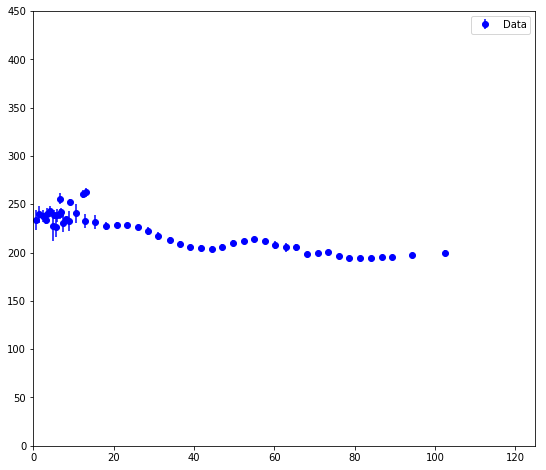

In [8]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,125)
plt.ylim(0,450)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
#plt.plot(r_dat,l_curve,label='Fit')
#plt.plot(r_dat,d_curve,label='Disk Only')
#plt.plot(r_dat,nodisk,label='No Disk')
#plt.plot(r_dat,b_curve,label='Bulge Only')

plt.legend()
plt.show()

l_fit